In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
from skimage import exposure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Eye extraction implementation
It is necessary to perform eye extraction before loading the dataset so that, prior to resizing, the images can be normalized in terms of aspect ratio.

In [ ]:
def eye_extraction(image: list) -> list:
  '''
  Calculates the borders of an eye so that the background can be deleted.
  Also gets converted from RGB to a grayscale image.

  Args:
    image (list): 3D matrix containing information about the image.

  Returns:
    list: A list containing 4 coordiantes of borders of the eye.
  '''
  image = rgb2gray(image)
  h, w = image.shape
  image = image * 255
  found_pixel = False
  threshold = 70
  x1, y1, x2, y2 = 0, 0, 0 , 0
  for i in range(h):
      for j in range(w):
        if image[i][j] > threshold:
            y1, found_pixel = i, True
            break
      if found_pixel:
          break

  found_pixel = False

  for j in range(w):
      for i in range(h):
          if image[i][j] > threshold:
            x1, found_pixel = j, True
            break
      if found_pixel:
          break


  found_pixel = False
  for i in range(h -1, -1, -1):
      for j in range(w -1, -1, -1):
          if image[i][j] > threshold:
            y2, found_pixel = i, True
            break
      if found_pixel:
          break


  found_pixel = False
  for j in range(w - 1, -1, -1):
      for i in range(h - 1, -1, -1):
          if image[i][j] > threshold:
              x2, found_pixel = j, True
              break
      if found_pixel:
          break

  return [x1, y1, x2, y2]

def rescale_image(coordinates: list, image: list) -> list:
  '''
  Rescales the image from the original to given coordinates.

  Args:
    coordinates (list): A list containing pairs of coordinates (x1, y1, x2, y2).
    image (list): A 2D list representing the image.

  Returns:
    list: The rescaled image.
  '''
  image = rgb2gray(image)
  x1, y1, x2, y2 = coordinates
  conv_img = np.zeros((y2 - y1, x2 - x1))
  for i in range(x2 - x1):
    for j in range(y2 - y1):
      conv_img[j][i] = image[j + y1][i + x1]
  return conv_img

Image edit example

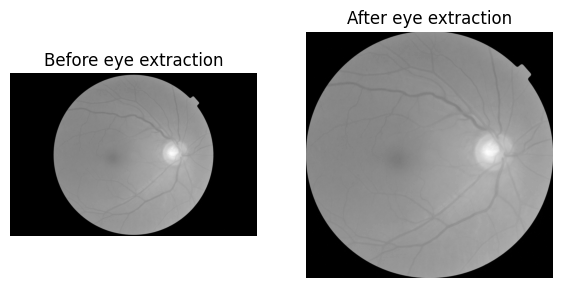

In [ ]:
img = Image.open("/content/drive/MyDrive/Datasets/Eye Diseases/glaucoma/Glaucoma_101.png")
img = np.array(img)
coordinates = eye_extraction(img)
converted_image = rescale_image(coordinates, img)
fig, ax = plt.subplots(1, 2, figsize=(7, 4))
ax[0].imshow(rgb2gray(img), cmap='gray')
ax[0].set_title('Before eye extraction')
ax[1].imshow(converted_image, cmap='gray')
ax[1].set_title('After eye extraction')
for a in ax:
    a.axis('off')
plt.show()

## Image loading

In [ ]:
data_folder = "/content/drive/MyDrive/Datasets/Eye Diseases"

class_names = os.listdir(data_folder)

data = []
labels = []

for class_name in class_names:
    class_folder = os.path.join(data_folder, class_name)
    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_name)

data, labels = shuffle(data, labels, random_state=42)
le = preprocessing.LabelEncoder()
labels_encoded = le.fit_transform(labels)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
original_label = le.inverse_transform([train_labels[0]])[0]


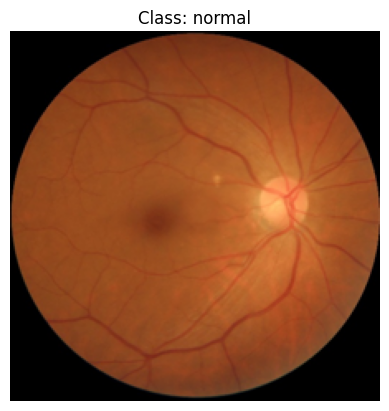

In [ ]:
plt.imshow(train_data[0])
plt.title(f"Class: {original_label}")
plt.axis('off');

RGB to grayscale conversion

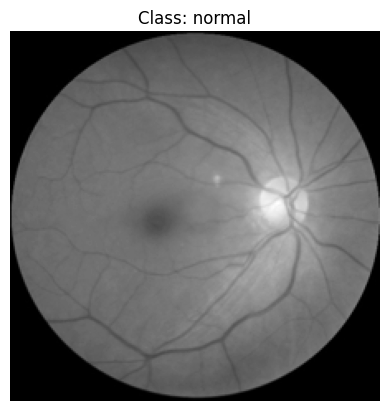

In [ ]:
plt.imshow(rgb2gray(train_data[0]), cmap='gray')
plt.title(f"Class: {original_label}")
plt.axis('off');

In [ ]:
gray_train_data = []
gray_test_data = []
for image in train_data:
  gray_train_data.append(rgb2gray(image))

for image in test_data:
  gray_test_data.append(rgb2gray(image))

## Feature extraction

Image histogram

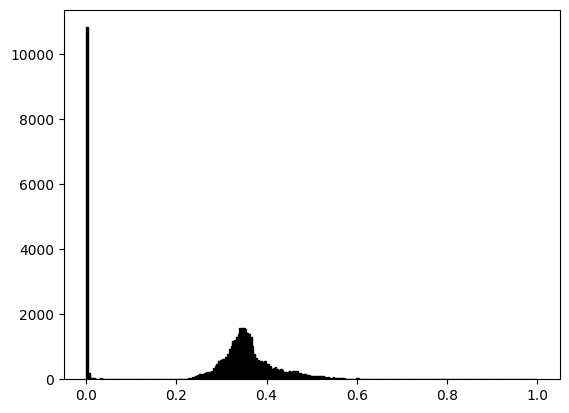

In [ ]:
plt.hist(gray_train_data[0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

Pytania:
- Jaki finalnie mógłby być temat pracy?
- Co porównać? Czy feature extraction + klasyfikacja vs deep conv learning?
- Czy trzeba z tego robić sprawozdanie jak z poprzedniego?

local binary pattern